<a href="https://colab.research.google.com/github/dushyantsinghraghav/Advanced-ML/blob/main/PCA_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import sklearn
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape = people.images[0].shape
print(faces.target_names)
print(faces.images.shape)

['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Saddam Hussein'
 'Serena Williams' 'Silvio Berlusconi' 'Tiger Woods' 'Tom Das

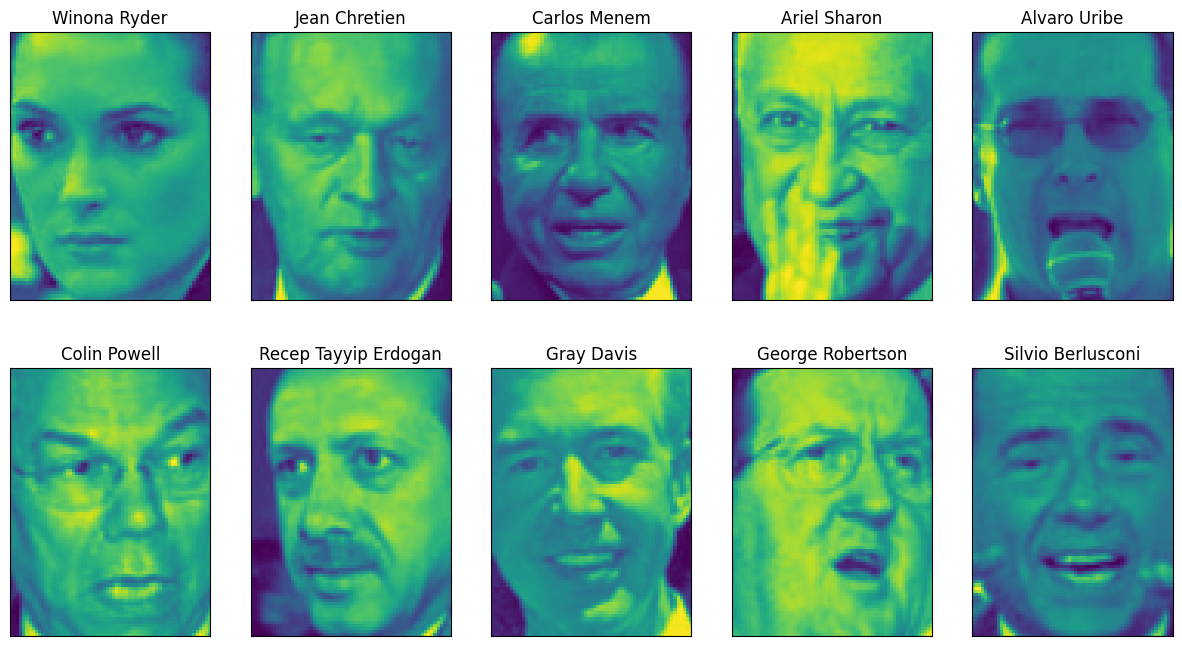

In [5]:
import matplotlib.pyplot as plt
fig , axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for target,image,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [9]:
print("people.images.shape: {}".format(people.images.shape))
print("No of classes : {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
No of classes : 62


In [16]:
##Lets count how often each target appears
import numpy as np
counts = np.bincount(people.target)
#print counts next to target names
for i,(count,name) in enumerate(zip(counts,people.target_names)):
    print("{0:25} {1:3}   ".format(name,count),end='')
    if(i+1)%3==0:
        print()

(3023,)
Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin           

In [18]:
##To make the data less skewed we will only take 50 images of each person
mask = np.zeros(people.target.shape,dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1
X_people = people.data[mask]
y_people = people.target[mask]
#scale the grayscale values to be between zero and 1
#instead of 0 and 255 for better numerical stability
X_people = X_people/255.

In [26]:
##Lets use a knn algorithm to undesrtand this
#split the data into training and testing data sets
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X_people,y_people,stratify=y_people,random_state=0)
##Lets use a knn algorithm to undesrtand this
#split the data into training and testing data sets
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_people,y_people,stratify=y_people,random_state=0)
#build a knn lagorithm using one neighbour
knn.fit(X_train,y_train)
print("Test set score of 1-nn : {:.2f}".format(knn.score(X_test,y_test)))


Test set score of 1-nn : 0.22


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 8.3 MB/s eta 0:00:00


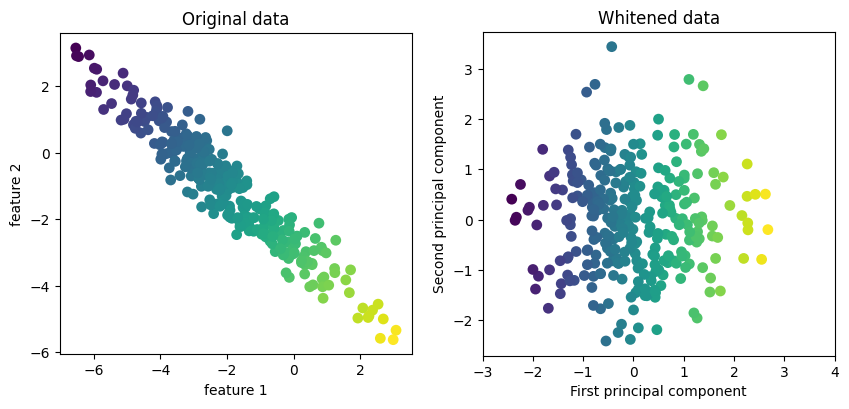

In [28]:
!pip install mglearn
import mglearn # Import the mglearn library
mglearn.plots.plot_pca_whitening()

In [30]:
#we fit the PCA object to the training data and extract the first 100 principal components
from sklearn.decomposition import PCA # Import the PCA class from sklearn.decomposition
pca = PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [34]:
#lets use it to classify our images using a one nearest neighbour classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca,y_test)))

Test set accuracy: 0.30


In [35]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


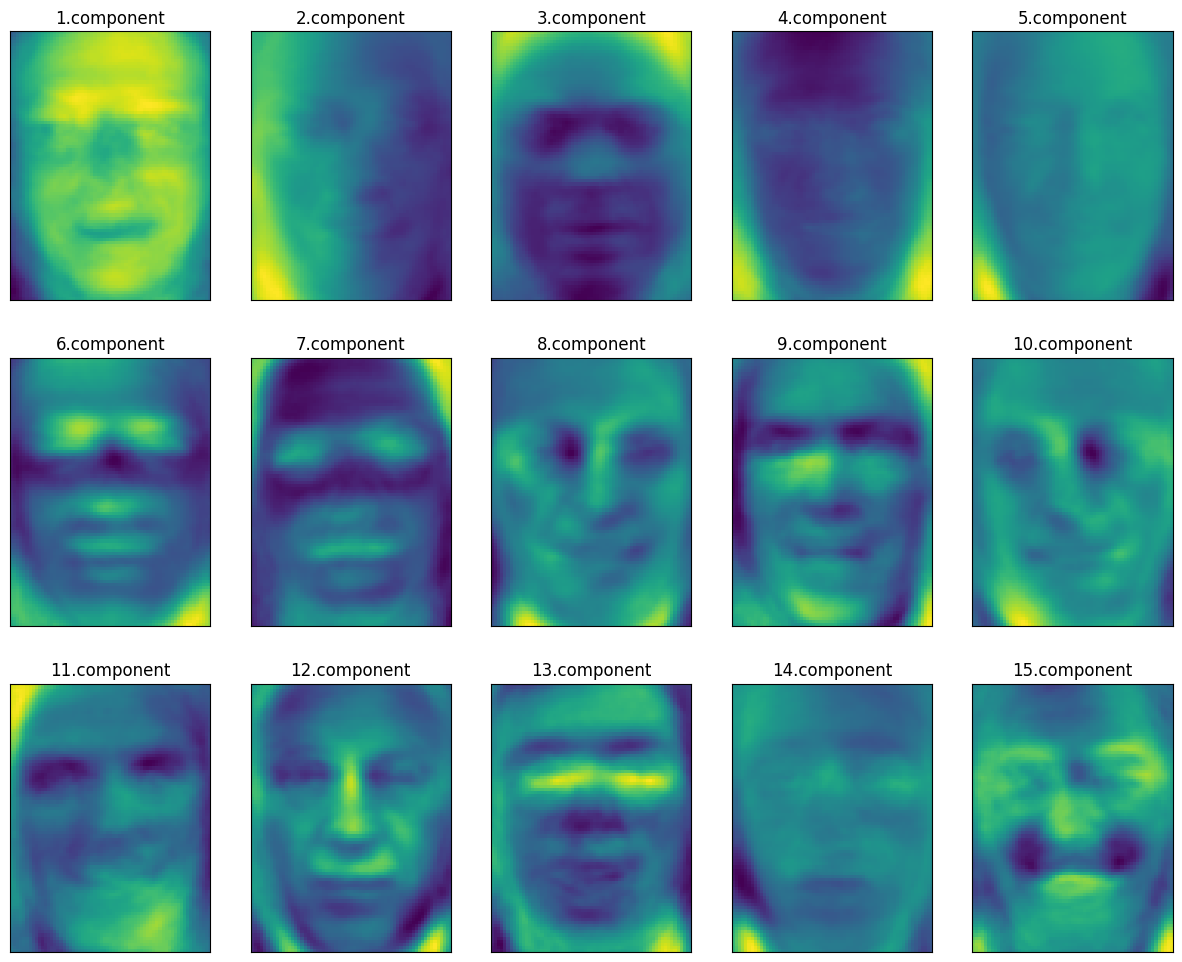

In [36]:
fig,axes = plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
for i, (component,ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("{}.component".format((i+1)))

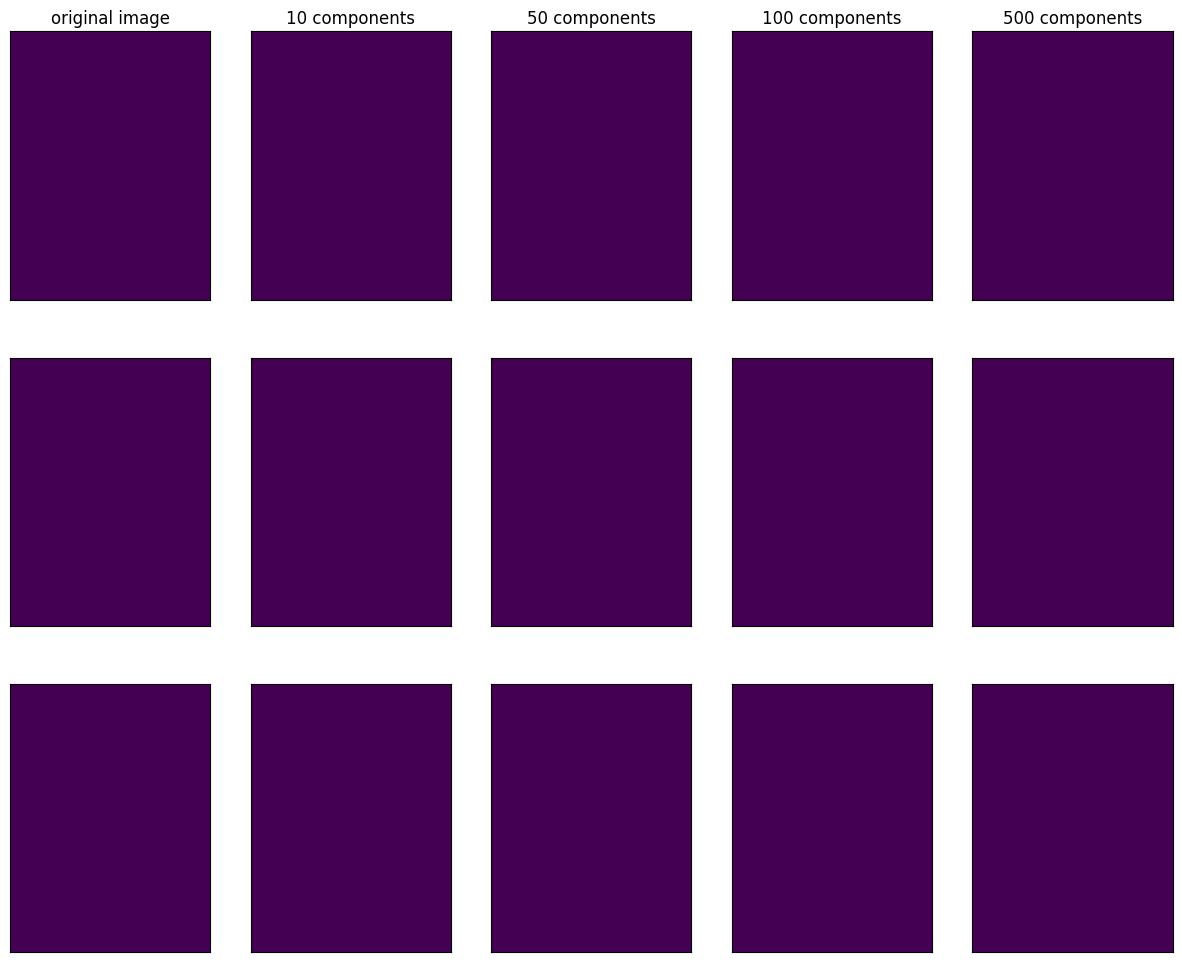

In [37]:
mglearn.plots.plot_pca_faces(X_train,X_test,image_shape)


Text(0, 0.5, 'Second principal component')

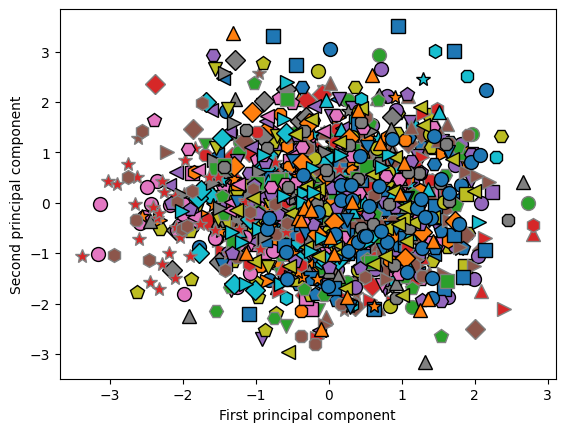

In [38]:
#USING A SCATTERPLOT to understand the effects of PCA
mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1],y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")